In [15]:
%pylab inline

import pandas as pd
import seaborn as sns
sns.set()
import pickle
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split , cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn import metrics
from sklearn.dummy import DummyClassifier

Populating the interactive namespace from numpy and matplotlib


In [2]:
with open('atxac_de.pickle', 'rb') as read_aacde:
    atxac_df = pickle.load(read_aacde)

In [4]:
X = atxac_df.drop(columns=['Outcome_Type','Updated_Outcome_Type'])
y = atxac_df['Updated_Outcome_Type']

In [5]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=.2, random_state=88,stratify=y)

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=24,stratify=y_train_val)

In [7]:
features = ['Sex_Upon_Outcome','Intake_Type','Intake_Condition']

In [8]:
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train[features])
top3 = ohe.transform(X_train[features]).toarray()

In [9]:
top3_val = ohe.transform(X_val[features]).toarray()

In [10]:
nb = BernoulliNB()
nb.fit(top3, y_train)
nb.score(top3_val, y_val)

0.7295505508433265

In [17]:
y_pred = nb.predict(top3_val)

In [20]:
from sklearn.metrics import confusion_matrix
print("NB confusion matrix: \n\n", confusion_matrix(y_val, y_pred,labels=['Adoption','Transfer','Other']))

NB confusion matrix: 

 [[4263  365  245]
 [1127 2911  203]
 [ 495  339  309]]


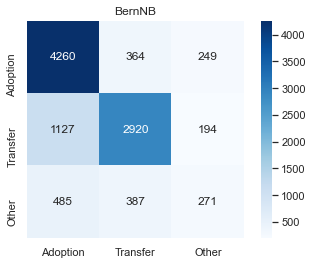

In [25]:
knn_confusion = confusion_matrix(y_val, y_pred,labels=['Adoption','Transfer','Other'])
figsize=(4,4)
sns.heatmap(knn_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt="d", xticklabels=['Adoption','Transfer','Other'],
           yticklabels=['Adoption','Transfer','Other'])
title('BernNB');

In [16]:
#for Bern.NB
dc = DummyClassifier() # not for real problems, just a baseline 
dc.fit(top3, y_train)
dc.score(top3_val, y_test)

/Users/chuckcao/anaconda3/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


0.41688602905332944

In [21]:
features = ['Sex_Upon_Outcome','Intake_Type','Intake_Condition','OutcomeBreed' , 'OutcomeColor']
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train[features])
all5 = ohe.transform(X_train[features]).toarray()
all5_val = ohe.transform(X_val[features]).toarray()

In [22]:
nb = BernoulliNB()
nb.fit(all5, y_train)
nb.score(all5_val, y_val)

0.7264307302330116

In [23]:
y_pred = nb.predict(all5_val)

In [24]:
from sklearn.metrics import confusion_matrix
print("NB confusion matrix: \n\n", confusion_matrix(y_val, y_pred,labels=['Adoption','Transfer','Other']))

NB confusion matrix: 

 [[4260  364  249]
 [1127 2920  194]
 [ 485  387  271]]
